# Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("portfolio_data.csv", header = [0,1], index_col = 0, parse_dates =[0])

# Portfolio Close Prices

In [3]:
df.Close
close = df.Close.copy()
close

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,O,SXRC.MU
Date,,,,,,,
2020-02-04,320.260010,5.422222,1550.400024,223.649994,374.350006,59.483833,5.720
2020-02-05,323.459991,6.361111,1557.800049,223.500000,383.250000,59.620541,5.650
2020-02-06,326.029999,7.361111,1565.099976,222.429993,380.500000,60.114216,5.885
2020-02-07,325.829987,8.656667,1568.599976,223.539993,382.399994,60.387623,5.730
2020-02-10,326.470001,9.333333,1574.699951,224.399994,378.700012,60.820538,5.770
...,...,...,...,...,...,...,...
2025-01-28,582.809998,25.870001,2766.800049,241.419998,901.099976,54.714359,4.256
2025-01-29,584.380005,26.240000,2769.100098,241.630005,914.599976,53.798805,4.283
2025-01-30,586.260010,27.040001,2823.000000,241.684998,894.000000,54.057545,4.282


# Assets Expected Return and Variance

In [4]:
# Get the list of assets (assuming they are the top-level columns of the 'Close' DataFrame)
assets = close.columns.get_level_values(0).unique()

In [5]:
results = {}

# Calculate returns for ALL assets FIRST 
returns_all_assets = close.pct_change().dropna()  


for asset in assets:
    asset_data = close[asset].dropna().to_frame().copy()
    asset_data.rename(columns={asset: "Price"}, inplace=True)

     # Calculate returns
    asset_data["returns"] = asset_data["Price"].pct_change() 

     # Annualize (252 trading days)
    expected_return = asset_data["returns"].mean() * 252 
    variance = asset_data["returns"].var() * 252

    # Print the value
    print(f"The expected return for {asset} is {expected_return:.2%} per year.")
    print(f"The variance for {asset} is {variance:.4f} per year.") 

     # Store both return and variance in a dictionary
    results[asset] = { 
        "Expected Return": expected_return,
        "Variance": variance
    }

The expected return for CW8.MI is 13.41% per year.
The variance for CW8.MI is 0.0282 per year.
The expected return for ETHE is 86.98% per year.
The variance for ETHE is 1.1685 per year.
The expected return for GC=F is 13.42% per year.
The variance for GC=F is 0.0266 per year.
The expected return for IDTP.L is 1.94% per year.
The variance for IDTP.L is 0.0062 per year.
The expected return for LYTNOW.SW is 20.58% per year.
The variance for LYTNOW.SW is 0.0679 per year.
The expected return for O is 3.35% per year.
The variance for O is 0.0984 per year.
The expected return for SXRC.MU is 2.24% per year.
The variance for SXRC.MU is 0.1528 per year.


C:\Users\marke\AppData\Local\Temp\ipykernel_21848\3328179111.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_all_assets = close.pct_change().dropna()


In [6]:
# DataFrame to summarize the results:
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\nSummary of Expected Annual Returns and Variances:")
print(results_df)


Summary of Expected Annual Returns and Variances:
           Expected Return  Variance
CW8.MI            0.134094  0.028179
ETHE              0.869837  1.168451
GC=F              0.134236  0.026565
IDTP.L            0.019421  0.006181
LYTNOW.SW         0.205762  0.067945
O                 0.033465  0.098402
SXRC.MU           0.022447  0.152798


In [7]:
results_df.to_csv("portfolio_return.csv")

C:\Users\marke\AppData\Local\Temp\ipykernel_21848\3644202952.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(asset, (results_df['Variance'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')


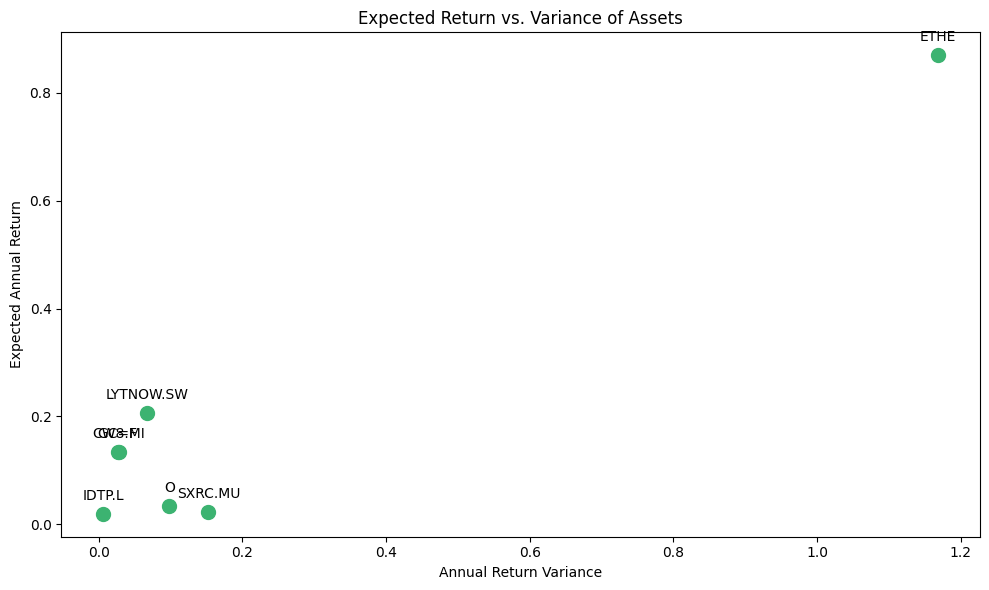

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Variance'], results_df['Expected Return'], color='mediumseagreen', s=100)  # Adjust marker size (s)
plt.xlabel('Annual Return Variance')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs. Variance of Assets')

# Add annotations for each point (optional):
for i, asset in enumerate(results_df.index):
    plt.annotate(asset, (results_df['Variance'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Covariance

In [9]:
covariance_matrix = returns_all_assets.cov() * 252  # Annualize the covariance matrix
covariance_matrix 

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,O,SXRC.MU
Ticker,,,,,,,
CW8.MI,0.027765,0.043254,0.001646,0.002167,0.028825,0.019797,-0.001934
ETHE,0.043254,1.135950,0.022762,0.010899,0.052188,0.064385,-0.014494
GC=F,0.001646,0.022762,0.025847,0.004848,0.006028,0.006853,0.001953
IDTP.L,0.002167,0.010899,0.004848,0.006033,0.003281,0.007295,0.004799
LYTNOW.SW,0.028825,0.052188,0.006028,0.003281,0.066265,0.015349,-0.004570
O,0.019797,0.064385,0.006853,0.007295,0.015349,0.095658,0.005089
SXRC.MU,-0.001934,-0.014494,0.001953,0.004799,-0.004570,0.005089,0.150194


In [10]:
covariance_matrix.to_csv("portfolio_covariance.csv")

# Portfolio Annual Return & Variance

In [11]:
# Set your desired weights:
weights = np.array([0.3, 0.1, 0.08, 0.12, 0.2, 0.1, 0.1])

In [12]:
# Make sure the number of weights matches the number of assets
if len(weights) != len(assets):
    raise ValueError("Number of weights must match the number of assets.")

In [13]:
# Normalize the weights (just in case they don't sum to exactly 1 due to rounding):
weights = weights / np.sum(weights)

In [14]:
portfolio_return = np.sum(weights * results_df['Expected Return'])
print(f"Portfolio Annual Return (using set weights): {portfolio_return:.2%}")


Portfolio Annual Return (using set weights): 18.70%


In [15]:
#Calculating portfolio variance with set weights:
portfolio_variance_value = weights.T @ covariance_matrix @ weights
print(f"Portfolio Variance (using set weights): {portfolio_variance_value}")


Portfolio Variance (using set weights): 0.03169937126214665
